<a href="https://colab.research.google.com/github/ArunK-ML/ML-DL-Classification-Regression-Model-Apartment-Rental---Dataset/blob/main/Apartment_Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
file_path = "/content/apartments_for_rent_classified_100K.csv"

with open(file_path, 'r', encoding='cp1252') as f:
    for i in range(5): # Read the first 5 lines
        line = f.readline()
        print(f"Line {i+1}: {line.strip()}")

Line 1: id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time
Line 2: 5668640009;housing/rent/apartment;One BR 507 & 509 Esplanade;This unit is located at 507 & 509 Esplanade, Redondo Beach, 90277, CAMonthly rental rates range from $2195We have 1 beds units available for rent;null;1;1;USD;No;Thumbnail;Cats;2195;$2,195;Monthly;542;507  509 Esplanade;Redondo Beach;CA;33.8520;-118.3759;RentLingo;1577360355
Line 3: 5668639818;housing/rent/apartment;Three BR 146 Lochview Drive;This unit is located at 146 Lochview Drive, Newport News, 23602, VAMonthly rental rates range from $1250We have 3 beds units available for rent;null;1.5;3;USD;No;Thumbnail;Cats,Dogs;1250;$1,250;Monthly;1500;146 Lochview Dr;Newport News;VA;37.0867;-76.4941;RentLingo;1577360340
Line 4: 5668639686;housing/rent/apartment;Three BR 3101 Morningside Drive;This unit is located at 3101 Morningside 

In [8]:
import pandas as pd

# ==============================
# 1. Load the CSV
# ==============================

file_path = "/content/apartments_for_rent_classified_100K.csv"

# The file is semicolon-separated
df = pd.read_csv(file_path, sep=';', encoding="cp1252", low_memory=False, quotechar='"')


# ==============================
# 2. Clean & Align Columns
# ==============================

# Strip extra spaces in column names
df.columns = df.columns.str.strip()

# Reset index - This might not be necessary after fixing the delimiter,
# but keep it for now if the original data had an index column.
df = df.reset_index(drop=True)

# ==============================
# 3. Save back to CSV
# ==============================
output_path = "apartments_for_rent_clean.csv"
df.to_csv(output_path, index=False)

print(f"Clean CSV saved as: {output_path}")

Clean CSV saved as: apartments_for_rent_clean.csv


In [9]:
import pandas as pd

df = pd.read_csv("/content/apartments_for_rent_clean.csv")

/tmp/ipython-input-2702983498.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/apartments_for_rent_clean.csv")


In [10]:
df.shape

(99492, 22)

In [11]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [12]:
# import pandas as pd

# # Example: create price categories
# bins = [0, 1000, 2000, 3000, 5000, 10000]
# labels = ["Very Low", "Low", "Medium", "High", "Luxury"]

# df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

# print(df[["price", "price_category"]].head())


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [14]:
df.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,16044
bathrooms,63
bedrooms,124
currency,0
fee,0
has_photo,0


In [15]:
df.duplicated().sum()

np.int64(84)

# **Data Cleaning & Preprocessing**

# **Handle Null values**

In [16]:
df.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,16044
bathrooms,63
bedrooms,124
currency,0
fee,0
has_photo,0


**DataType Change**

In [17]:
df = df.dropna(subset=["latitude", "longitude","price"])

In [18]:
# from geopy.geocoders import Nominatim

# # Initialize geocoder
# geolocator = Nominatim(user_agent="geoapiExercises")


# # Function to get address
# def get_address(lat, lon):
#     try:
#         location = geolocator.reverse((lat, lon), exactly_one=True)
#         return location.address if location else "Address not found"
#     except:
#         return "Error fetching address"

# # Apply function and create new column
# df["Address_Find"] = df.apply(lambda row: get_address(row["latitude"], row["longitude"]), axis=1)



In [19]:
df["pets_allowed"] = df["pets_allowed"].fillna("Allowed & Not Allowed")

df["amenities"] = df["amenities"].fillna("No Amenities")

In [20]:
# KNN Imputer

import numpy as np
from sklearn.impute import KNNImputer


# Select only the columns you want to use for imputation
# ---- STEP 1: Select only target + helper columns ----
cols_for_impute = ["bathrooms","bedrooms"]

# ---- STEP 2: Apply KNN imputer only on these columns ----
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df[cols_for_impute])

# ---- STEP 3: Put back only the Age column (target) ----
df["bathrooms"] = imputed[:, 0]   # 0th column corresponds to bathrooms
df["bedrooms"] = imputed[:, 1]   # 1st column corresponds to bedrooms

print("\nImputer Complete")


Imputer Complete


In [21]:
# Fill missing address using city + state
df["address"] = df["address"].fillna(
    df["cityname"].astype(str) + ", " + df["state"].astype(str)
)

print("\nAddress Null Value Handle Complete")


Address Null Value Handle Complete


In [22]:
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,"Houston, TX",Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,"Jacksonville, FL",Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,"San Diego, CA",San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,"Huntersville, NC",Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [ ]:
# Example numeric columns
num_cols = ["price", "square_feet", "price_per_sqft"]

for col in num_cols:
    # Try converting to numeric, invalid values become NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where any numeric column became NaN
df = df.dropna(subset=num_cols)

print("Rows with invalid characters removed ✅")


In [23]:
df.duplicated().sum()

np.int64(84)

In [24]:
df.drop_duplicates(inplace=True)

In [45]:
import pandas as pd
import re

def count_numeric_and_non_numeric(df):
    summary = {}

    number_pattern = re.compile(r"^-?\d+(\.\d+)?$")  # only pure integers or floats

    for col in df.columns:
        numeric_count = 0
        non_numeric_count = 0

        for val in df[col].astype(str):  # convert everything to string
            if number_pattern.match(val.strip()):
                numeric_count += 1
            else:
                non_numeric_count += 1

        total = len(df[col])
        summary[col] = {
            "numeric_count": numeric_count,
            "non_numeric_count": non_numeric_count,
            "total": total
        }

    return pd.DataFrame(summary).T

# Result
summary_df = count_numeric_and_non_numeric(df)
print(summary_df)


                  numeric_count  non_numeric_count  total
id                        99382                  0  99382
category                      0              99382  99382
title                         1              99381  99382
body                          0              99382  99382
amenities                     0              99382  99382
bathrooms                 99382                  0  99382
bedrooms                  99382                  0  99382
currency                      0              99382  99382
fee                           0              99382  99382
has_photo                     0              99382  99382
pets_allowed                  0              99382  99382
price                     99382                  0  99382
price_display                 0              99382  99382
price_type                    0              99382  99382
square_feet               99382                  0  99382
address                       0              99382  99382
cityname      

In [42]:
# df.to_csv("apartments_clean.csv", index=False)

# **Feature Engineering & Selection**

In [25]:

# transformations
df["price_per_sqft"] = df["price"] / df["square_feet"]
df["room_count"] = df["bedrooms"] + df["bathrooms"]
df["log_price"] = np.log1p(df["price"])
df["avg_room_size"] = df["square_feet"] / (df["room_count"].replace(0, np.nan))

#Use latitude & longitude to cluster apartments into neighborhoods.

from sklearn.cluster import KMeans
df["location_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(df[["latitude","longitude"]])


In [26]:
# create price categories
bins = [0, 1000, 2000, 3000, 5000, 10000]
labels = ["Very Low", "Low", "Medium", "High", "Luxury"]

df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

print(df[["price", "price_category"]].head())

median_price = df["price"].median()
df["affordability"] = df["price"].apply(lambda x: "Affordable" if x <= median_price else "Expensive")


    price price_category
0  2195.0         Medium
1  1250.0            Low
2  1395.0            Low
3  1600.0            Low
4   975.0       Very Low


In [27]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,longitude,source,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-118.3759,RentLingo,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,-76.4941,RentLingo,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,-78.6438,RentLingo,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,-121.9712,RentLingo,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-106.6110,RentLingo,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [28]:
df.dtypes

,0
id,int64
category,object
title,object
body,object
amenities,object
bathrooms,float64
bedrooms,float64
currency,object
fee,object
has_photo,object


In [29]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time', 'price_per_sqft',
       'room_count', 'log_price', 'avg_room_size', 'location_cluster',
       'price_category', 'affordability'],
      dtype='object')

In [30]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,longitude,source,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-118.3759,RentLingo,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,-76.4941,RentLingo,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,-78.6438,RentLingo,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,-121.9712,RentLingo,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-106.6110,RentLingo,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [31]:
# list of columns you want to copy
cols_to_copy = ['amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
        'price_type', 'square_feet', 'time', 'price_per_sqft',
       'room_count', 'log_price', 'avg_room_size', 'location_cluster',
       'price_category', 'affordability']

# make a copy into new DataFrame
df_selected = df[cols_to_copy].copy()

In [32]:
df_selected.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,No Amenities,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,Monthly,542,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,No Amenities,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,Monthly,1500,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,No Amenities,2.0,3.0,USD,No,Thumbnail,Allowed & Not Allowed,1395.0,Monthly,1650,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,No Amenities,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,Monthly,820,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,No Amenities,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,Monthly,624,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [33]:
df_selected.dtypes

,0
amenities,object
bathrooms,float64
bedrooms,float64
currency,object
fee,object
has_photo,object
pets_allowed,object
price,float64
price_type,object
square_feet,int64


In [34]:
# -----------------------------
# Encode Categorical columns
# -----------------------------
#  Label Encoding (if order matters or for tree models)
from sklearn.preprocessing import LabelEncoder

cat_cols = df_selected.select_dtypes(include=['category',"object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df_selected[col] = le.fit_transform(df_selected[col])

In [35]:
df_selected.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,9521,1.0,1.0,0,0,1,1,2195.0,0,542,1577360355,4.049815,2.0,7.694393,271.000000,6,3,1
1,9521,1.5,3.0,0,0,1,2,1250.0,0,1500,1577360340,0.833333,4.5,7.131699,333.333333,3,1,0
2,9521,2.0,3.0,0,0,1,0,1395.0,0,1650,1577360332,0.845455,5.0,7.241366,330.000000,3,1,1
3,9521,1.0,2.0,0,0,1,2,1600.0,0,820,1577360330,1.951220,3.0,7.378384,273.333333,0,1,1
4,9521,1.0,1.0,0,0,1,2,975.0,0,624,1577360308,1.562500,2.0,6.883463,312.000000,4,4,0


In [36]:
df_selected.describe()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
count,99382.000000,99382.00000,99382.000000,99382.0,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,9.938200e+04,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000
mean,7460.053058,1.44514,1.727748,0.0,0.002022,1.469964,0.769385,1527.163792,0.000070,956.478064,1.559664e+09,1.685936,3.172889,7.226769,314.679713,4.255680,1.969723,0.498632
std,2859.211618,0.54718,0.748960,0.0,0.044927,0.658897,0.968806,904.444467,0.011437,417.696001,1.105181e+07,0.858566,1.190796,0.438967,141.964205,2.328124,1.359204,0.500001
min,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,0.000000,101.000000,1.544174e+09,0.047083,1.000000,4.615121,21.090909,0.000000,0.000000,0.000000
25%,6176.000000,1.00000,1.000000,0.0,0.000000,1.000000,0.000000,1014.000000,0.000000,729.000000,1.550832e+09,1.120229,2.000000,6.922644,262.500000,2.000000,1.000000,0.000000
50%,9162.000000,1.00000,2.000000,0.0,0.000000,2.000000,0.000000,1350.000000,0.000000,900.000000,1.568745e+09,1.470238,3.000000,7.208600,300.000000,4.000000,1.000000,0.000000
75%,9521.000000,2.00000,2.000000,0.0,0.000000,2.000000,2.000000,1795.000000,0.000000,1115.000000,1.568767e+09,2.001445,4.000000,7.493317,361.500000,6.000000,3.000000,1.000000
max,9823.000000,9.00000,9.000000,0.0,1.000000,2.000000,4.000000,52500.000000,2.000000,50000.000000,1.577391e+09,37.023977,15.000000,10.868587,25000.000000,9.000000,5.000000,1.000000


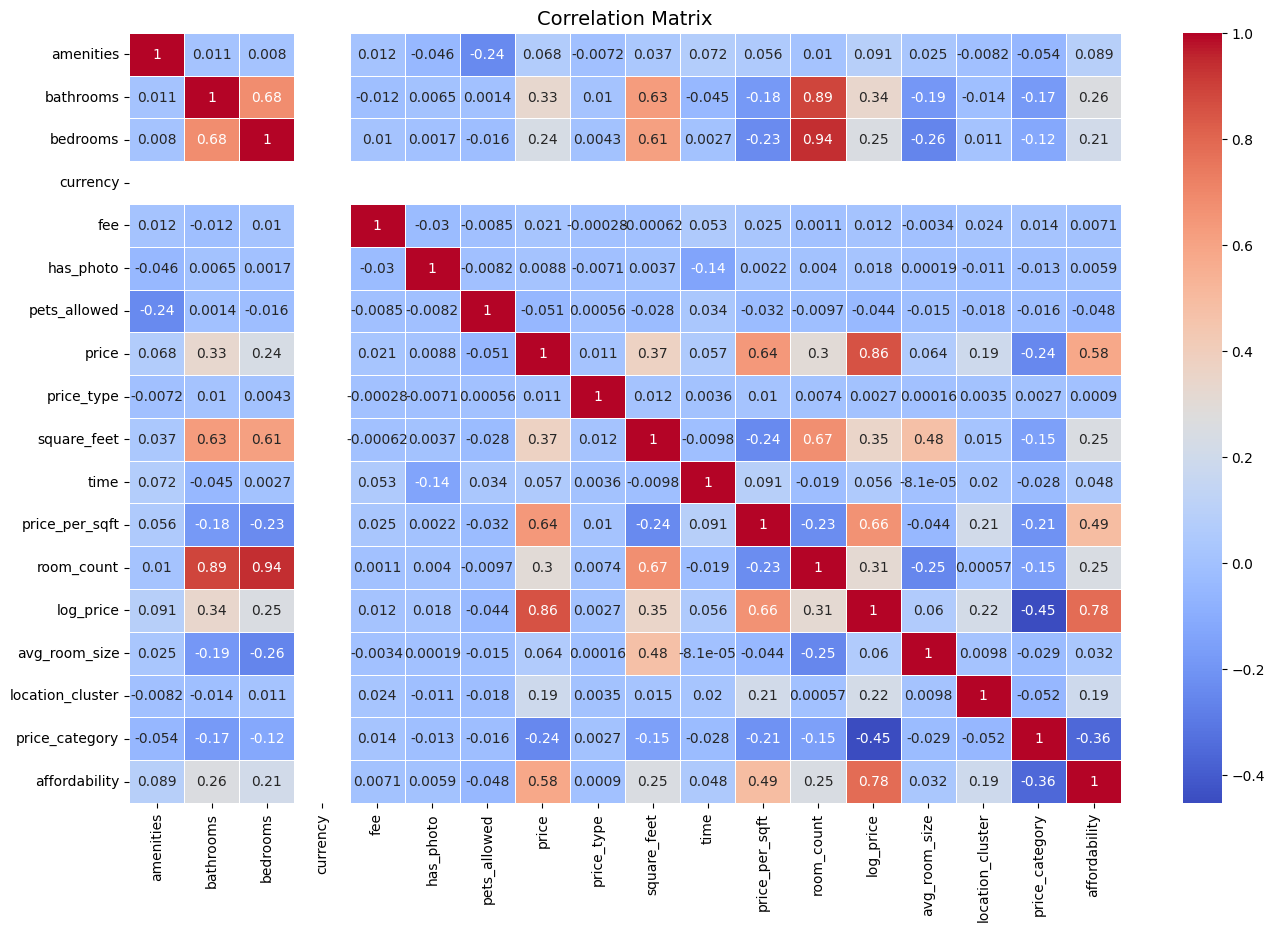

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# **Check Distribution**

In [38]:
df_selected.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price', 'price_type', 'square_feet', 'time',
       'price_per_sqft', 'room_count', 'log_price', 'avg_room_size',
       'location_cluster', 'price_category', 'affordability'],
      dtype='object')

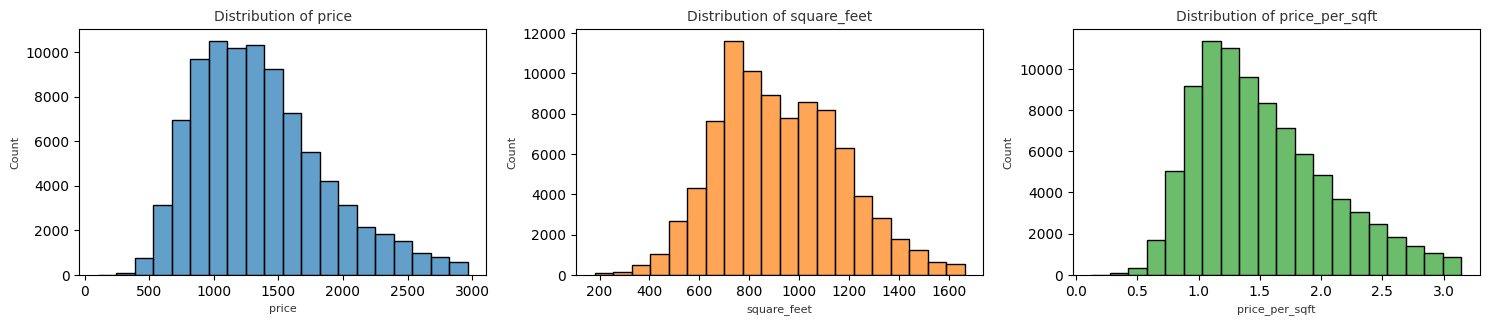

In [52]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown

plt.figure(figsize=(15, 18)) # size figure

# loop over each column to draw
numerical_cols = ['price','square_feet','price_per_sqft']
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # (row, col, #plot) - Changed to 6 rows and 3 columns to accommodate all numerical columns
    sns.histplot(df_selected[col], bins=20, color=colors[i % len(colors)], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()


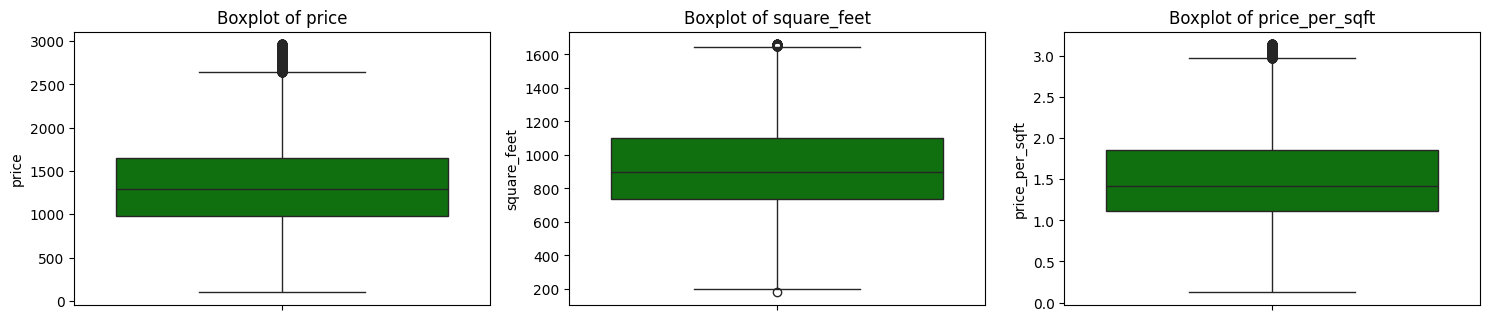

In [49]:
# Outliers

plt.figure(figsize=(15, 18)) # size figure
# loop over each columns
numerical_cols = ['price','square_feet','price_per_sqft']
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_selected[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [48]:
df_selected.shape

(88770, 18)

**Handle Outlier**

In [47]:
import pandas as pd

def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame column using the IQR method.
    Keeps only rows within [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column name to apply IQR filter

    Returns:
        pd.DataFrame: DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Trim data
    df_trimmed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Before: {len(df)} rows, After: {len(df_trimmed)} rows")

    return df_trimmed

# Call :
df_selected = remove_outliers_iqr(df_selected, "price")
df_selected = remove_outliers_iqr(df_selected, "square_feet")
df_selected = remove_outliers_iqr(df_selected, "price_per_sqft")


Column: price
Lower Bound: -157.5, Upper Bound: 2966.5
Before: 99382 rows, After: 94686 rows
Column: square_feet
Lower Bound: 162.5, Upper Bound: 1662.5
Before: 94686 rows, After: 92444 rows
Column: price_per_sqft
Lower Bound: -0.0919840955299005, Upper Bound: 3.1460995482270313
Before: 92444 rows, After: 88770 rows


**Handle Skewness**

In [51]:
import numpy as np
from scipy.stats import boxcox

# -------------------------
# Skewness Handling (Box-Cox)
# -------------------------
def handle_skewness_boxcox(df, column):
    """
    Apply Box-Cox transformation to handle skewness.
    Only works if column has strictly positive values.
    Creates a new column with '_boxcox' suffix.
    """
    if (df[column] <= 0).any():
        print(f"[BoxCox] Skipped {column} (contains non-positive values).")
        return df

    transformed, lam = boxcox(df[column])
    df[column + "_boxcox"] = transformed
    print(f"[BoxCox] {column} transformed with λ={lam:.4f}")
    return df


# -------------------------
# Apply to all numeric columns
# -------------------------
def fix_skewness_all(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df = handle_skewness_boxcox(df, col)
    return df


# -------------------------
# Call
# -------------------------
df_selected = handle_skewness_boxcox(df_selected, "price")
df_selected = handle_skewness_boxcox(df_selected, "price_per_sqft")


[BoxCox] price transformed with λ=0.1490
[BoxCox] price_per_sqft transformed with λ=0.0650


In [53]:
df_selected.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability,price_boxcox,price_per_sqft_boxcox
1,9521,1.5,3.0,0,0,1,2,1250.0,0,1500,1577360340,0.833333,4.5,7.131699,333.333333,3,1,0,12.707496,-0.181246
2,9521,2.0,3.0,0,0,1,0,1395.0,0,1650,1577360332,0.845455,5.0,7.241366,330.000000,3,1,1,13.027627,-0.166969
3,9521,1.0,2.0,0,0,1,2,1600.0,0,820,1577360330,1.951220,3.0,7.378384,273.333333,0,1,1,13.434984,0.683179
4,9521,1.0,1.0,0,0,1,2,975.0,0,624,1577360308,1.562500,2.0,6.883463,312.000000,4,4,0,12.001810,0.452819
5,9521,1.5,2.0,0,0,1,2,1250.0,0,965,1577360308,1.295337,3.5,7.131699,275.714286,4,1,0,12.707496,0.260958


# **Test**

In [54]:
df_selected.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price', 'price_type', 'square_feet', 'time',
       'price_per_sqft', 'room_count', 'log_price', 'avg_room_size',
       'location_cluster', 'price_category', 'affordability', 'price_boxcox',
       'price_per_sqft_boxcox'],
      dtype='object')

In [63]:
df_selected.dtypes

,0
amenities,category
bathrooms,category
bedrooms,category
currency,category
fee,int64
has_photo,category
pets_allowed,category
price,float64
price_type,category
square_feet,int64


In [61]:
df_selected["amenities"] = df_selected["amenities"].astype('category')
df_selected["bathrooms"] = df_selected["bathrooms"].astype('category')
df_selected["bedrooms"] = df_selected["bedrooms"].astype('category')
df_selected["currency"] = df_selected["currency"].astype('category')
df_selected["has_photo"] = df_selected["has_photo"].astype('category')
df_selected["pets_allowed"] = df_selected["pets_allowed"].astype('category')
df_selected["price_type"] = df_selected["price_type"].astype('category')
df_selected["room_count"] = df_selected["room_count"].astype('category')
df_selected["location_cluster"] = df_selected["location_cluster"].astype('category')
df_selected["price_category"] = df_selected["price_category"].astype('category')
df_selected["affordability"] = df_selected["affordability"].astype('category')

In [62]:
continuous = ['fee', 'price', 'square_feet', 'time','price_per_sqft',
              'log_price', 'avg_room_size','price_boxcox','price_per_sqft_boxcox']

category =['amenities', 'bathrooms', 'bedrooms', 'currency', 'has_photo',
           'pets_allowed', 'price_type','room_count',
           'location_cluster', 'price_category', 'affordability']

In [64]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03, replace=True, random_state=i)
    sample2=d2.sample(frac=0.03, replace=True, random_state=i)
    t_test,p_value=stats.ttest_ind(sample1,sample2, nan_policy='omit')
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    contingency_table = pd.crosstab(d1,d2)
    # Check if any dimension of the table is zero
    if contingency_table.shape[0] == 0 or contingency_table.shape[1] == 0:
        return False # Cannot perform chi-square on empty table
    return True if stats.chi2_contingency(contingency_table)[1] < 0.1 else False


#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    # Convert d2 to category if it's not already
    if not pd.api.types.is_categorical_dtype(d2):
        d2 = d2.astype('category')

    group = d2.cat.categories
    data = {}
    for i in group:
        # Convert category label to string for comparison
        group_data = d1[d2.astype(str) == str(i)].dropna() # Drop NaN values for ANOVA
        if len(group_data) > 1:
            data[i]=group_data
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups with data
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True


# Determine continuous and categorical columns from df_Final
continuous = df_selected.select_dtypes(include=np.number).columns
category = df_selected.select_dtypes(include='category').columns


final = {}
for i in df_selected.columns:
    final[i]={}
    for j in df_selected.columns:
        result = None # Initialize result
        if i == j: # Skip comparison of a column with itself
            result = False
        elif (i in continuous) and (j in continuous):
            result=two_sample(df_selected[i],df_selected[j])
        elif (i in continuous) and (j in category):
            result=annova_test(df_selected[i],df_selected[j])
        elif (i in category) and (j in continuous):
            result=annova_test(df_selected[j],df_selected[i])
        elif (i in category) and (j in category):
             # Check if either column is empty before performing chi-square
            if not df_selected[i].empty and not df_selected[j].empty:
                 result=chisquare_cat_vs_cat(df_selected[i],df_selected[j])
            else:
                 result = False # Cannot perform chi-square on empty data

        if result is not None: # Check if result was assigned
            if result:
                final[i][j]=1
            else:
                final[i][j]=0


final_df = pd.DataFrame(final)
final_df

/tmp/ipython-input-572382529.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-572382529.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-572382529.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-572382529.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-572382529.py:33: DeprecationWarning: is_categorical_dtype

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability,price_boxcox,price_per_sqft_boxcox
amenities,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0
bathrooms,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0
bedrooms,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0
currency,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
has_photo,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0
pets_allowed,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0
price,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
price_type,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
square_feet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

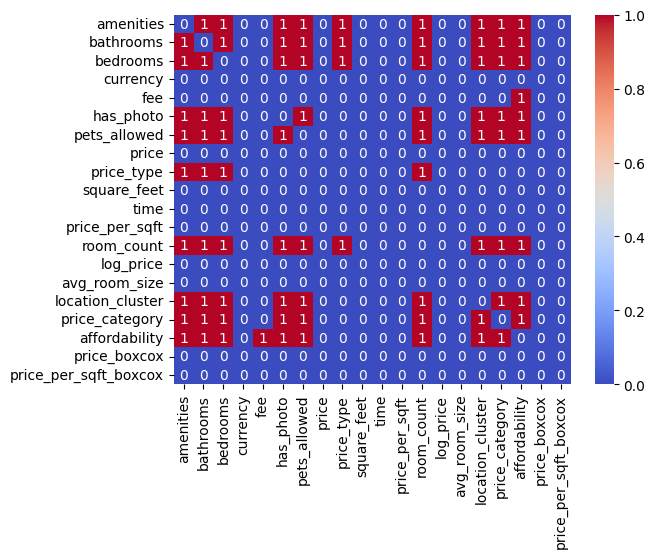

In [65]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")